# Dataset Overview

In [2]:
import pandas as pd 

file_path = r"D:\Project\House_Pricing.csv"
df = pd.read_csv(file_path)

print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

# Duplicate Removal

In [3]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows before removal: {duplicate_rows}")

df = df.drop_duplicates()
print(f"Duplicate rows after removal: {df.duplicated().sum()}")

Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [4]:
df_T = df.T

duplicate_columns = df_T.duplicated().sum()
print (f"Duplicate columns after removal: {duplicate_columns}")

df = df.loc[:, ~df_T.duplicated()]
print (f"Duplicate columns after removal: {df_T.duplicated().sum()}")

Duplicate columns after removal: 0
Duplicate columns after removal: 0


# Handling Missing Values

In [5]:
missing_values = df.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Liv

In [6]:
num_cols = df.select_dtypes(include = ["number"])
df[num_cols.columns] = num_cols.apply(lambda col: col.fillna(col.mean()), axis = 0)

In [8]:
cat_cols = df.select_dtypes(include = ["object"])
df[cat_cols.columns] = cat_cols.apply(lambda col: col.fillna(col.mode()[0]), axis = 0)

In [9]:
print ("missing values after imputation:\n", df.isnull().sum())

missing values after imputation:
 ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation 

# Scaling Numerical Variables

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


num_cols = df.select_dtypes(include=["number"]).columns.tolist()


target_col = "Sale Price"  
if target_col in num_cols:
    num_cols.remove(target_col)

print("Numerical Columns to be Scaled:", num_cols)


Numerical Columns to be Scaled: ['ID', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [26]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [27]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [29]:
print(df[num_cols].describe())  


                 ID  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  \
count  2.161300e+04    2.161300e+04     2.161300e+04         2.161300e+04   
mean  -1.624060e-16    1.972543e-16    -5.891327e-16         3.682080e-17   
std    1.000023e+00    1.000023e+00     1.000023e+00         1.000023e+00   
min   -1.591970e+00   -3.624404e+00    -2.746230e+00        -1.949233e+00   
25%   -8.542511e-01   -3.987371e-01    -4.736480e-01        -7.077746e-01   
50%   -2.347893e-01   -3.987371e-01     1.756611e-01        -1.850554e-01   
75%    9.485833e-01    6.764851e-01     5.003157e-01         5.119035e-01   
max    1.849366e+00    3.185793e+01     7.642716e+00         1.247999e+01   

       Lot Area (in Sqft)  No of Floors  Overall Grade  \
count        2.161300e+04  2.161300e+04   2.161300e+04   
mean         1.315028e-17 -3.156068e-17   1.315028e-16   
std          1.000023e+00  1.000023e+00   1.000023e+00   
min         -3.522024e-01 -9.154270e-01  -5.991845e+00   
25%         -2.4

# Encoding Categorical Variables

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", cat_cols)

Categorical Columns: []


In [35]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True) 

In [36]:
ordinal_col = "Condition"
if ordinal_col in cat_cols:
    le = LabelEncoder()
    df[ordinal_col] = le.fit_transform(df[ordinal_col])

In [37]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  float64
 1   Sale Price                                 21613 non-null  float64
 2   No of Bedrooms                             21613 non-null  float64
 3   No of Bathrooms                            21613 non-null  float64
 4   Flat Area (in Sqft)                        21613 non-null  float64
 5   Lot Area (in Sqft)                         21613 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Overall Grade                              21613 non-null  float64
 8   Area of the House from Basement (in Sqft)  21613 non-null  float64
 9   Basement Area (in Sqft)                    21613 non-null  float64
 10  Age of House (in Years

In [38]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

target_col = "Sale Price"  
if target_col in num_cols:
    num_cols.remove(target_col)

print("Numerical Columns for Outlier Analysis:", num_cols)

Numerical Columns for Outlier Analysis: ['ID', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


# Outlier Removal

In [39]:
import numpy as np

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


df_cleaned = remove_outliers(df, num_cols)


In [40]:
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_cleaned.shape}")

Original dataset shape: (21613, 37)
Dataset shape after outlier removal: (15102, 37)


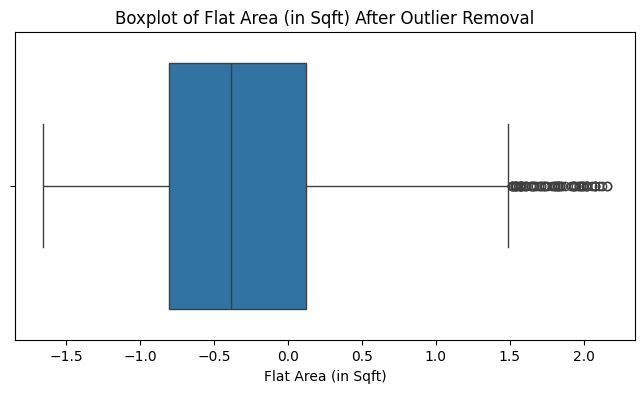

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = "Flat Area (in Sqft)" 
plt.figure(figsize=(8,4))
sns.boxplot(data=df_cleaned, x=feature)
plt.title(f"Boxplot of {feature} After Outlier Removal")
plt.show()

# Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

target_col = "Sale Price"  
X = df.drop(columns=[target_col])  
y = df[target_col]  

print(f"Feature set shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

Feature set shape: (21613, 36)
Target variable shape: (21613,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (17290, 36), (17290,)
Testing set shape: (4323, 36), (4323,)


In [46]:
print(f"Training set mean: {y_train.mean():.2f}, Testing set mean: {y_test.mean():.2f}")

Training set mean: -0.01, Testing set mean: 0.03
